In [402]:
from sklearn.datasets import fetch_openml
import pandas as pd 
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import time as dt
from IPython.display import Math,Latex
from sympy import latex,init_printing
init_printing(use_unicode=True,use_latex=True)

# 1 
(1 балл) Загрузите предложенный вам датасет с помощью функции `sklearn.datasets.fetch_openml`. Выведите текстовое описание загруженного датасета. Обозначьте целевую переменную за `y`, а остальные данные за `X`.

In [403]:
df=fetch_openml('vineyard')

c:\Users\ivant\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:320: UserWarning: Multiple active versions of the dataset matching the name vineyard exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=192
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=713

  warn(warning_msg)


In [404]:
print(df.DESCR)
y=df.target
X=df.data

**Author**:   
**Source**: Unknown -   
**Please cite**:   

Dataset from Smoothing Methods in Statistics 
 (ftp stat.cmu.edu/datasets)

 Simonoff, J.S. (1996). Smoothing Methods in Statistics. New York: Springer-Verlag.

Downloaded from openml.org.


# 2
(1 балл) Выведите основную статистическую информацию о данных. Сделайте количественное описание датасета: число строк (объектов), число столбцов (признаков), статистику по признакам.

In [405]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lugs_1989  52 non-null     float64
 1   lugs_1990  52 non-null     float64
dtypes: float64(2)
memory usage: 964.0 bytes


In [406]:
X.isna().sum()

lugs_1989    0
lugs_1990    0
dtype: int64

In [407]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 52 entries, 0 to 51
Series name: lugs_1991
Non-Null Count  Dtype  
--------------  -----  
52 non-null     float64
dtypes: float64(1)
memory usage: 548.0 bytes


# 3
(1 балл) Выведите тип данных каждого признака и целевой переменной. Убедитесь, что в данных все признаки являются числовыми. В случае, если это не так, удалите нечисловые колонки.

In [408]:
X.dtypes

lugs_1989    float64
lugs_1990    float64
dtype: object

In [409]:
y.dtypes

dtype('float64')

В данных все признаки являются числовыми

# 4
(1 балл) Убедитесь, что нет пропущенных значений в данных и у целевой переменной. В случае, если это не так, заполните пропуски медианными значениями.

In [410]:
X.isna().sum()

lugs_1989    0
lugs_1990    0
dtype: int64

In [411]:
y.isna().sum()

0

В данных нет пропущенных значений

# 5
(1 балл) Постройте гистограмму распределения целевой переменной. Сделайте вывод по графику. Предположите, какому виду распределения она принадлежит.

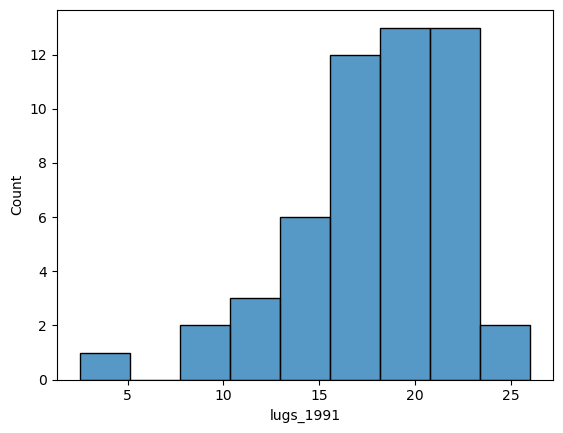

In [412]:
sns.histplot(y)
plt.show()

Выдвинем предположение о том, что `y` относится к нормальному распределению:

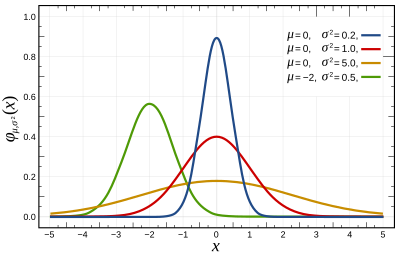

# 6
(4 балл) Обучите модель линейной регрессии на рассматриваемых данных, написанную своими руками. Проиллюстрируйте работу модели графиком обучения и распределения целевой переменной. Выведите уравнение полученной гиперплоскости.

Нормализуем данные

In [413]:
X_mm=pd.DataFrame(MinMaxScaler().fit_transform(X))
y_mm=pd.DataFrame(MinMaxScaler().fit_transform(pd.DataFrame(y)))

In [414]:
X_mm.shape

Создадим класс модели линейной регрессии

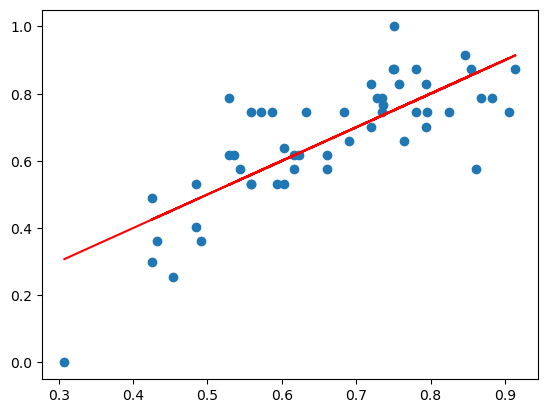

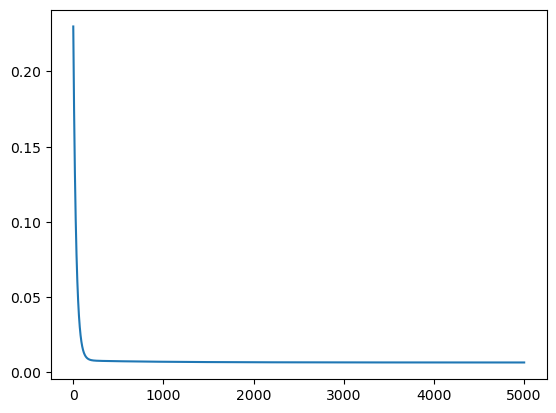

<IPython.core.display.Math object>

In [416]:
class Model(object):
    """Модель линейной регрессии"""
    def __init__(self, shape,alpha=0.01,max_steps=1000):
        """Initialize Model

        Args:
            shape (tuple-like): shape of X dataset
        """
        
        self.shape = shape
        self.alpha=alpha
        self.max_steps=max_steps
        self.b = np.zeros([self.shape[1] + 1, 1])
        self.x0 = pd.DataFrame({'x0': np.ones(self.shape[0])})
        
    def predict(self, X=pd.DataFrame()):
        if X.shape==(0,0):
            X=self.x_all
        
        return X @ self.b
    
    def error(self,Y,X=pd.DataFrame()):
        if X.shape==(0,0):
            X=self.x_all
            
        return 1/(2*self.shape[0]) * (Y - self.predict(X)).T @ (Y - self.predict(X))
    
    def fit(self, X, Y, accuracy=0.01):
        alpha=self.alpha
        max_steps=self.max_steps
        start_time = dt.time()
        x_all = pd.concat([self.x0, X], axis=1)
        self.x_all = x_all
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ_b = -1/self.shape[0] * x_all.T @ (Y - self.predict(x_all))
            self.b -= alpha * dJ_b
            new_err = self.error(Y).iloc[0,0]
            step += 1
            steps.append(step)
            errors.append(new_err)
            
        self.errors=errors
        self.steps=steps
        
        stop_time=dt.time()
        self.study_time_seconds = stop_time-start_time
        
        return steps, errors, self.b
    
    
    def plot(self, Y,X=pd.DataFrame()):
        if X.shape==(0,0):
            X=self.x_all

        yy=self.predict()
        plt.scatter(yy,Y)
        plt.plot(yy,yy,c='r')
        plt.title('Distribution plot')
        plt.show()
    
    def study_plot(self):
        plt.plot(self.steps,self.errors)
        plt.title('Study plot')
        plt.show()
    
    def score(self, Y,X=pd.DataFrame() ):
        y_pred = np.array(self.predict())
        Y=np.array(Y)
        ss_res = np.sum((Y - y_pred)**2)
        ss_total = np.sum((Y - np.mean(Y))**2)
        r2 = 1 - (ss_res / ss_total)
        return r2

    def MSE(self, Y,X=pd.DataFrame() ):
        Y_pred = self.predict()
        MSE = np.mean((Y_pred - Y)**2)
        return MSE

    def RMSE(self, Y,X=pd.DataFrame() ):
        return np.sqrt(self.MSE(Y))

    def MAE(self, Y,X=pd.DataFrame() ):
        Y_pred = self.predict()
        MAE = np.mean(abs(Y_pred - Y))
        return MAE

    def MAPE(self, Y,X=pd.DataFrame() ):
        Y_pred = self.predict()
        MAPE = np.mean(abs(Y_pred - Y)/Y)*100
        return MAPE
    
    def show_metrics(self, y,X=pd.DataFrame() ):
        text=f'''
Error after gradient descent = {self.error(y).iloc[0,0]}
R2 Score = {round(self.score(y),4)}
Root of Mean Squared Error = {round(self.RMSE(y),2)}
Mean Squared Error = {round(self.MSE(y),2)}
Mean Absolute Error = {round(self.MAE(y),2)}
Study Time = {self.study_time_seconds*1000} ms
        '''
        print(text)
    
    def complex_out(self,x,y,show_plots=True,show_metrics=True):
        self.fit(x, y)
        if show_plots:
            self.plot(y)
            self.study_plot()
        if show_metrics:
            self.show_metrics(y)
        display(Math('y = '+ '+'.join([str(np.array(self.b)[i,0])+f'x_{i}' if i!=0 else str(np.array(self.b)[i,0]) for i in range(len(np.array(self.b)))])))

model_me = Model(X_mm.shape,max_steps=5000)
model_me.complex_out(X_mm, y_mm,show_metrics=False)

# 7
(2 балл) Обучите модель `LinearRegression()` линейной регрессии на рассматриваемых данных из библиотеки `sklearn`. Выведете уравнение полученной гиперплоскости. Убедитесь, что уравнения гиперплоскостей, полученных с помощью модели написанной своими руками и библиотечной, будут примерно одинаковыми.

In [417]:
model=LinearRegression()
model.fit(X_mm,y_mm)

display(Math('y = '+ f'{model.intercept_[0]}+'+'+'.join([str(model.coef_[0,i])+f'x_{i+1}' for i in range(len(model.coef_[0]))])))

<IPython.core.display.Math object>

Мы убедились, что уравнения гиперплоскостей, полученных с помощью модели написанной своими руками и библиотечной, будут примерно одинаковыми.

# 8
(1 балл) Оцените работу моделей, рассчитав для каждой из них метрики: коэффициент детерминации и ошибку MSE. Сделайте выводы по качеству работы моделей.

In [420]:
display(Math('Метрики~модели,~написанной~своими~руками:'))
display(Math('Коэффициент~детерминации = ' + f'{model_me.score(y_mm)}'))
display(Math('Ошибка~MSE = ' + f'{model_me.MSE(y_mm)}'))
display(Math('Метрики~модели~из~sklearn:'))
display(Math('Коэффициент~детерминации = ' + f'{r2_score(y_mm, model.predict(X_mm))}'))
display(Math('Ошибка~MSE = ' + f'{mean_squared_error(y_mm, model.predict(X_mm))}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Отлиичия в метриках незначительны. Модели работают одинаково хорошо